In [2]:
from tardis import run_tardis

In [9]:
sim_2020_30d = run_tardis("2020/2020_williamson_94I/code_comp_setups/30d.yml")

[tardis.model.base   ][WARNING]  Abundances have not been normalized to 1. - normalizing (base.py:601)
[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from /home/hp/Repositories/GSoC_Tardis/tardis-data/kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[py.warnings         ][WARNING]  /home/hp/anaconda3/envs/tardis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:109)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:170)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:176)
[tardis.plasma.properties.atomic][WARNING]  Zeta_data missing - replaced with 1s. Missing ions: [(11, 12), (12, 13), (14, 15), (16, 17), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (26, 27)

Populating the interactive namespace from numpy and matplotlib


(3000.0, 9000.0)

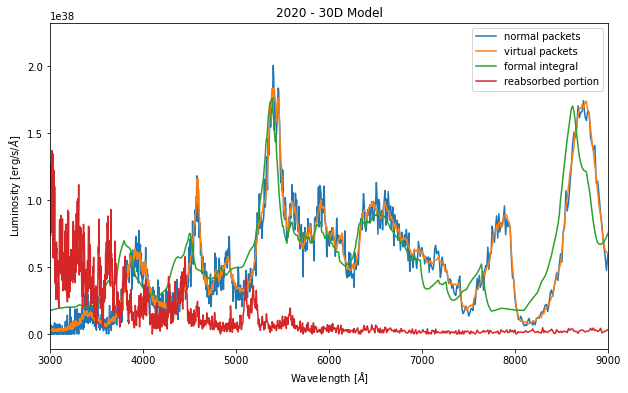

In [21]:
%pylab inline

spectrum = sim_2020_30d.runner.spectrum
spectrum_virtual = sim_2020_30d.runner.spectrum_virtual
spectrum_integrated = sim_2020_30d.runner.spectrum_integrated
spectrum_re_absorbed = sim_2020_30d.runner.spectrum_reabsorbed

figure(figsize=(10, 6))
plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label="normal packets")
plot(
    spectrum.wavelength,
    spectrum_virtual.luminosity_density_lambda,
    label="virtual packets",
)
plot(
    spectrum.wavelength,
    spectrum_integrated.luminosity_density_lambda,
    label="formal integral",
)
plot(
    spectrum.wavelength,
    spectrum_re_absorbed.luminosity_density_lambda,
    label="reabsorbed portion",
)
xlabel("Wavelength [$\AA$]")
ylabel("Luminosity [erg/s/$\AA$]")
legend()
title("2020 - 30D Model")
xlim(3000, 9000)

In [14]:
from tardis.visualization import SDECPlotter

<AxesSubplot:xlabel='Wavelength $[\\mathrm{\\AA}]$', ylabel='$L_{\\lambda}$ [erg $\\mathrm{s^{-1}}$ $\\mathrm{\\AA^{-1}}$]'>

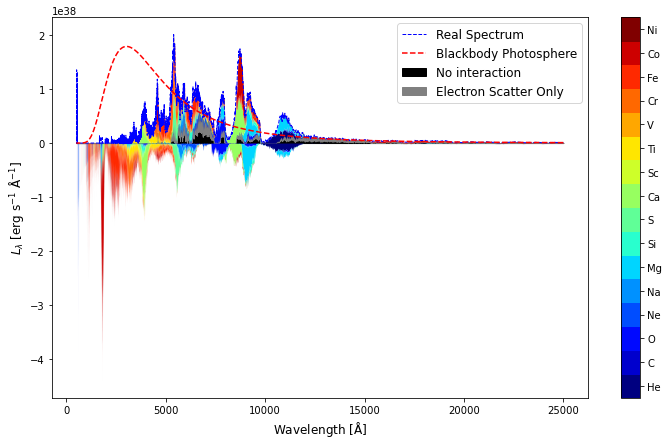

In [27]:
plotter = SDECPlotter.from_simulation(sim_2020_30d)

plotter.generate_plot_mpl("real")
# plotter.generate_plot_mpl("virtual")